<a href="https://colab.research.google.com/github/gustavoramos82/ocorr-nias-cimes/blob/main/occorrencias_panorama_geral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização Acerca das Ocorrências Nacionais

Neste projeto, será revisitado um dos primeiro projeto que fiz para aprendizado das blibiotecas *pandas*, *matplotlib* e *seaborn* no qual vai ser feita a análises de occorrência no Brasil nos anos de 2015 a 2021 (cujos dados pode ser obtido [aqui](https://dados.mj.gov.br/dataset/sistema-nacional-de-estatisticas-de-seguranca-publica/resource/feeae05e-faba-406c-8a4a-512aec91a9d1)) 

Nesta análise vai ser feita difrentes análise com objetivo d e avaliar se houve uma queda nas ocorrência no decorrer no anos e quais Estados há prevalência em que tipo de ocorrência.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df_oco = pd.read_excel('/content/indicadoressegurancapublicauf.xlsx')
df_oco.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,0
4,Acre,Roubo a instituição financeira,2022,janeiro,0


### Dicionário dos Dados

- **UF**: Estado onde ocorreu a ocorrência;
- **Tipo Crime**: Tipo de crime cometido;
- **Ano**: Ano da ocorrência;
- **Mes**: Mes em que foi feita a ocorrência;
- **Ocorrências**: Quantidade de ocorrências feitas.

In [12]:
# Escolhi renomear algumas colunas para ficar mais fácil a leitura
df_oco.columns = ["Estado", "Tipo do Crime","Ano","Mês","Qt de Ocorrências"]

In [13]:
df_oco.head()

,Estado,Tipo do Crime,Ano,Mês,Qt de Ocorrências
0,Acre,Estupro,2022,janeiro,31
1,Acre,Furto de veículo,2022,janeiro,50
2,Acre,Homicídio doloso,2022,janeiro,10
3,Acre,Lesão corporal seguida de morte,2022,janeiro,0
4,Acre,Roubo a instituição financeira,2022,janeiro,0


In [17]:
df_oco[df_oco['Ano']==2022]['Mês'].value_counts()

fevereiro    243
março        243
janeiro      237
abril        223
maio         220
Name: Mês, dtype: int64

In [18]:
# Irei desconsiderar o ano de 2022 porque só tem informações até maio
df_oco = df_oco[df_oco['Ano']!=2022]

In [34]:
df_oco.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20234 entries, 1166 to 21399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado             20234 non-null  object
 1   Tipo do Crime      20234 non-null  object
 2   Ano                20234 non-null  int64 
 3   Mês                20234 non-null  object
 4   Qt de Ocorrências  20234 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 948.5+ KB


In [22]:
ano_oco = df_oco.groupby('Ano').sum()

In [24]:
ano_oco

,Qt de Ocorrências
Ano,
2015,665986
2016,719561
2017,713944
2018,647390
2019,550837
2020,450254
2021,457240


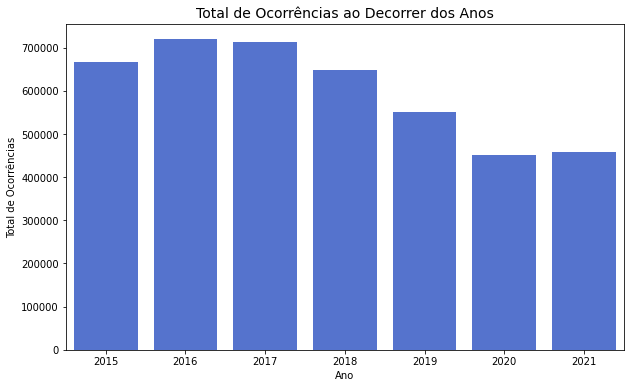

In [30]:
plt.figure(figsize=(10,6))
plt.title('Total de Ocorrências ao Decorrer dos Anos',fontsize=14)
sns.barplot(x=ano_oco.index,y='Qt de Ocorrências',data=ano_oco,color='royalblue')
plt.ylabel('Total de Ocorrências');

Podemos ver que 2015,2016 e 2017 tivemos em 700 mil ocorrências e que aprtir de 2018 o número vem despencando para em torno de 400 mil.

In [33]:
ano_oco_mes = df_oco.groupby(['Ano','Tipo do Crime']).sum()
ano_oco_mes.reset_index(inplace=True)
ano_oco_mes

,Ano,Tipo do Crime,Qt de Ocorrências
0,2015,Estupro,43591
1,2015,Furto de veículo,268950
2,2015,Homicídio doloso,49628
3,2015,Lesão corporal seguida de morte,723
4,2015,Roubo a instituição financeira,1271
...,...,...,...
58,2021,Roubo a instituição financeira,388
59,2021,Roubo de carga,13438
60,2021,Roubo de veículo,136144
61,2021,Roubo seguido de morte (latrocínio),1384


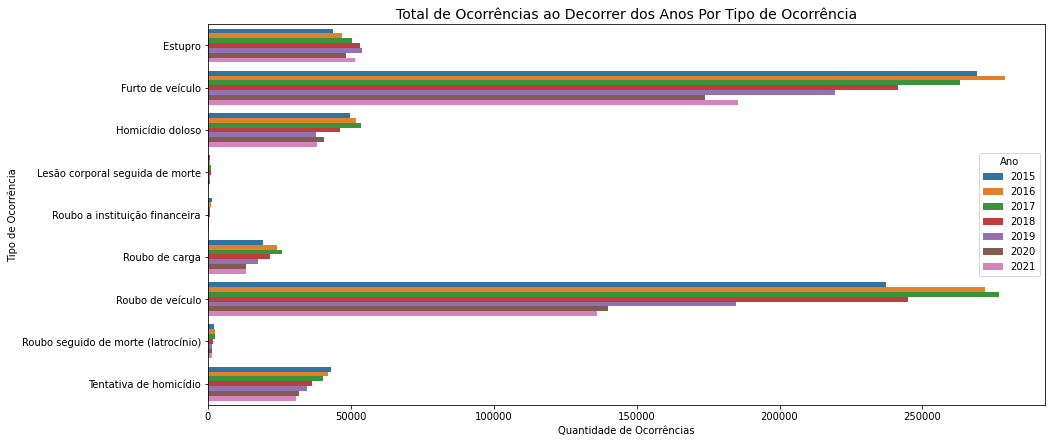

In [39]:
plt.figure(figsize=(15,7))
plt.title('Total de Ocorrências ao Decorrer dos Anos Por Tipo de Ocorrência',fontsize=14)
sns.barplot(y='Tipo do Crime',x='Qt de Ocorrências',data=ano_oco_mes,
            hue='Ano')
plt.ylabel('Tipo de Ocorrência')
plt.xlabel('Quantidade de Ocorrências');

Podemos ver que os crimes mais cometidos são furto e roubo de eveiculos, enquato lesão corporal e roubo a instituição financeira são os menos cometidos.

In [44]:
ano_oco_mes_ano = df_oco.groupby(['Ano','Mês']).sum()
ano_oco_mes_ano.reset_index(inplace=True)
ano_oco_mes_ano

,Ano,Mês,Qt de Ocorrências
0,2015,abril,55014
1,2015,agosto,53877
2,2015,dezembro,59153
3,2015,fevereiro,52346
4,2015,janeiro,59205
...,...,...,...
79,2021,maio,38022
80,2021,março,37905
81,2021,novembro,40187
82,2021,outubro,39340


In [47]:
ano_oco_mes_ano['Mês'].unique()

array(['abril', 'agosto', 'dezembro', 'fevereiro', 'janeiro', 'julho',
       'junho', 'maio', 'março', 'novembro', 'outubro', 'setembro'],
      dtype=object)

In [49]:
ano_oco_mes_ano['Mês'] = ano_oco_mes_ano['Mês'].map{'janeiro':1,'fevereiro':2,'março':3,'abril':4,'maio':5,'junho':6,'julho':7,
                          'agosto':8,'setembro':9,'outubro':10,'novembro':11,'dezembro':12}

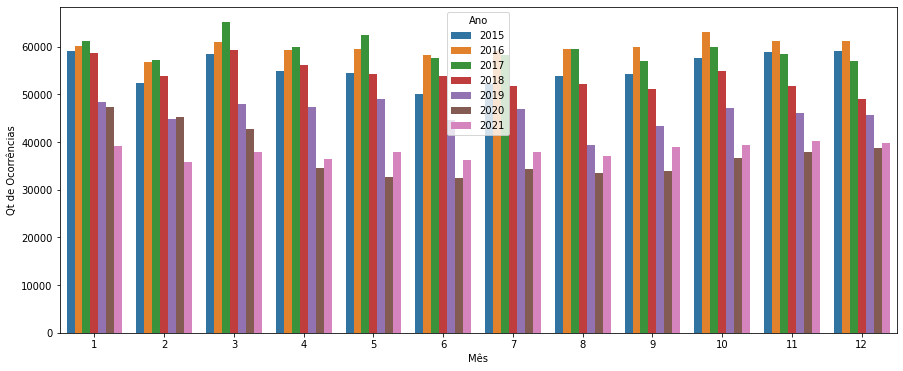

In [59]:
plt.figure(figsize=(15,6))
sns.barplot(x='Mês',y='Qt de Ocorrências',data=ano_oco_mes_ano,hue='Ano')

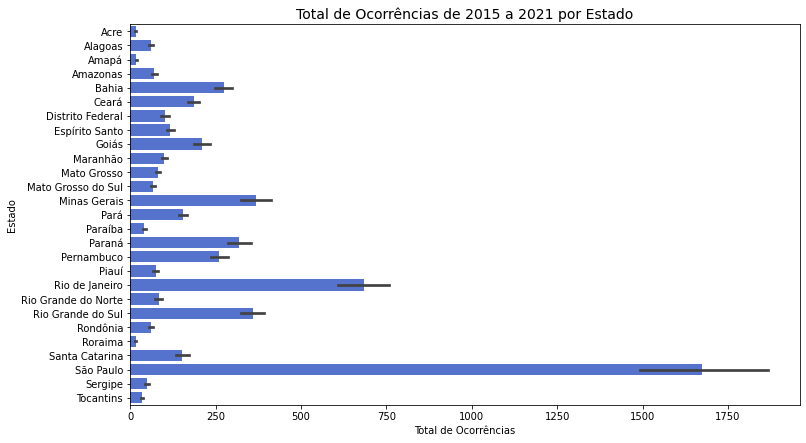

In [69]:
plt.figure(figsize=(12,7))
plt.title('Total de Ocorrências de 2015 a 2021 por Estado',fontsize=14)
sns.barplot(y='Estado',x='Qt de Ocorrências',data=df_oco,color='royalblue')
plt.xlabel('Total de Ocorrências');